# *Aufgabe: Lineare Methoden*

0. Importieren Sie alle die nötigen Bibliotheken.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import cm

In [2]:
def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def plot_original_data(ax, x, y):
    ax.scatter(x[np.argwhere(y>=50)].ravel(),y[np.argwhere(y>=50)].ravel(),c="green",label="Bestanden")
    ax.scatter(x[np.argwhere(y<50)].ravel(),y[np.argwhere(y<50)].ravel(),c="red",label="Nicht bestanden")

### Aufgabe 1. Lineare Regression per Hand

1. Kopieren und visualisieren Sie (am besten mit scatter) die Daten:

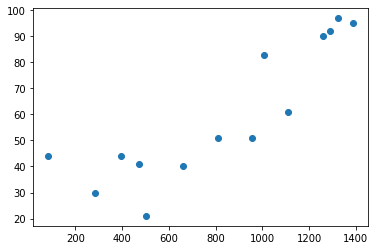

In [3]:
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

plt.scatter(studying, result)

2. Definieren Sie Vektoren mit Gewichten und Bias Werten und berechnen Sie die lineare Regression sowie den Fehler. Visualisieren Sie Ihr Ergebnis.

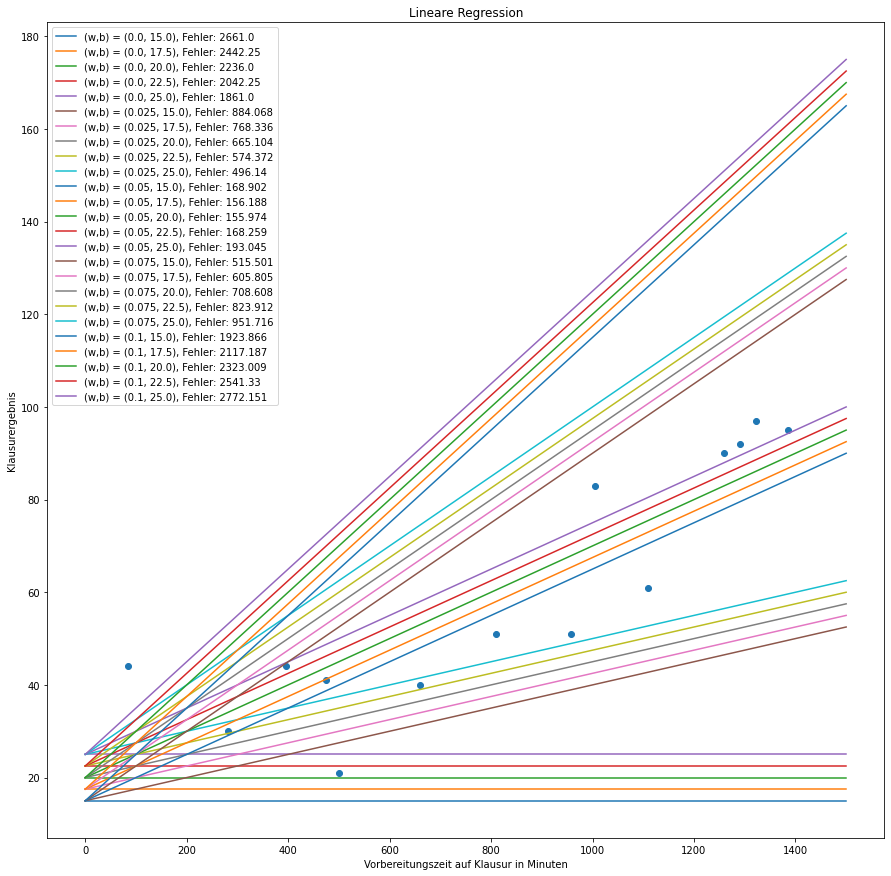

In [4]:
ws = np.linspace(0, 0.1, 5)
bs = np.linspace(15,25, 5)
combinations = np.array([[w, b] for w in ws for b in bs])
x_axis = np.linspace(0, 1500)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Lineare Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

for wb in combinations:
    w, b = wb[0], wb[1]
    prediction = w * studying + b
    error = mse(prediction, result)
    ax.plot(x_axis, w * x_axis + b, label="(w,b) = ({}, {}), Fehler: {}".format(round(w,3),b, round(error,3)))
ax.legend()

### Aufgabe 2. Polynomiale Regression

1. Implementieren Sie polinomiale Modelle (grad von 1 bis 7) für die Regressionsaufgabe. Visualisieren Sie alle Modelle auf einem Graphen. Vergleichen Sie auch den Fehler. 

[0.         0.05328915]
[ 0.00000000e+00 -4.38277699e-02  6.22038683e-05]
[ 0.00000000e+00 -1.00019546e-01  1.54543832e-04 -4.15747470e-08]
[ 0.00000000e+00 -6.80396702e-02  5.88281586e-05  5.94337258e-08
 -3.45994622e-11]
[ 0.00000000e+00 -1.10010760e-01  2.34364182e-04 -2.37312535e-07
  1.84153286e-10 -5.85226312e-14]
[ 0.00000000e+00 -1.07548686e-05 -3.66937445e-04  1.20612545e-06
 -1.52035213e-09  9.13136934e-13 -2.13665755e-16]
[ 0.00000000e+00 -2.02247081e-08 -6.27341827e-09 -1.10401630e-06
  4.08694722e-09 -5.58905096e-12  3.39952287e-15 -7.73784450e-19]


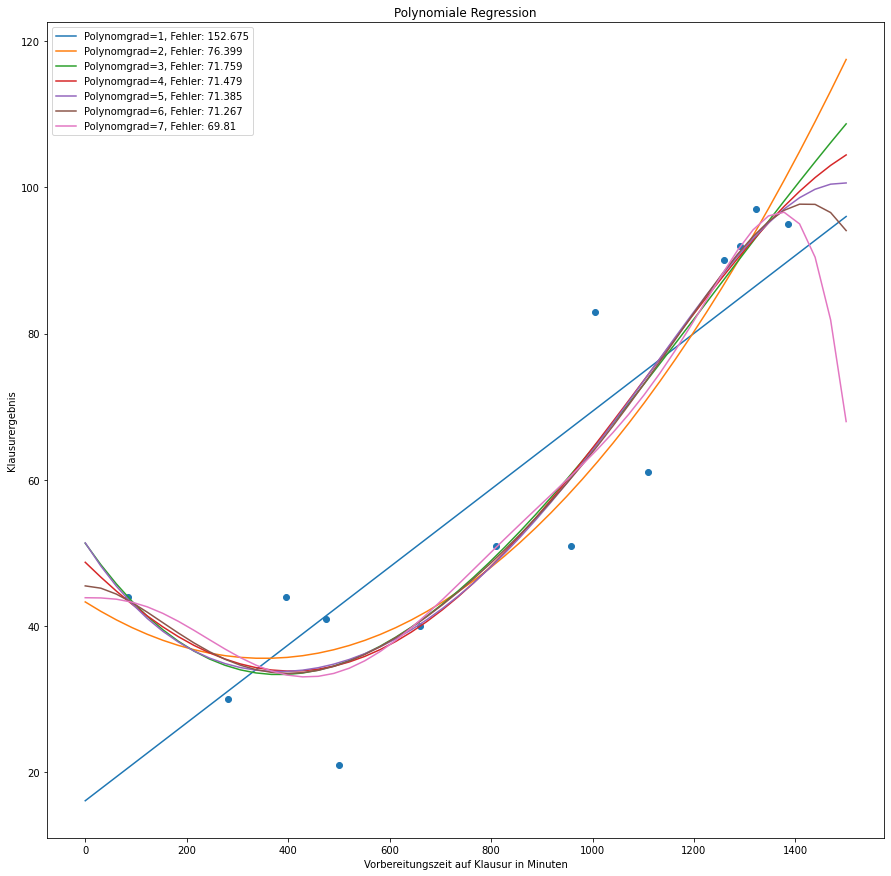

In [5]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Polynomiale Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

for i in range(1, 8):
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(studying.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly,result)
    print(model.coef_)
    prediction = model.predict(poly.transform(studying.reshape(-1, 1)))
    error = mse(prediction, result)
    
    predicted_plot = model.predict(poly.transform(x_axis.reshape(-1, 1)))
    ax.plot(x_axis, predicted_plot, label="Polynomgrad={}, Fehler: {}".format(i, round(error,3)))

ax.legend()       

2. Binarisieren Sie den result Vektor und implementieren Sie die Logistischer Regression für die Klassifikationsaufgabe. 

Genauigkeit für Polynomgrad 1: 100.0 Prozent.
[[-1.11241727e-07  9.16005146e-02]]
Genauigkeit für Polynomgrad 2: 100.0 Prozent.
[[-2.85302508e-05 -1.08584699e-02  9.38549037e-05]]
Genauigkeit für Polynomgrad 3: 100.0 Prozent.
[[-3.58511292e-07 -3.00363299e-05 -2.34452549e-03  2.93517386e-06]]
Genauigkeit für Polynomgrad 4: 100.0 Prozent.
[[-8.06353007e-11 -6.76995790e-09 -5.64145019e-07 -4.31526240e-05
   5.33500004e-08]]
Genauigkeit für Polynomgrad 5: 100.0 Prozent.
[[-1.18915376e-14 -9.98847447e-13 -8.38367478e-11 -6.97896541e-09
  -5.32119431e-07  6.57048812e-10]]
Genauigkeit für Polynomgrad 6: 100.0 Prozent.
[[-1.41459245e-18 -1.18825698e-16 -9.98066473e-15 -8.37631889e-13
  -6.97064480e-11 -5.31008025e-09  6.55587948e-12]]
Genauigkeit für Polynomgrad 7: 100.0 Prozent.
[[-1.81484263e-22 -1.52446970e-20 -1.28055091e-18 -1.07557956e-16
  -9.02660962e-15 -7.51115273e-13 -5.72043185e-11  7.06239083e-14]]


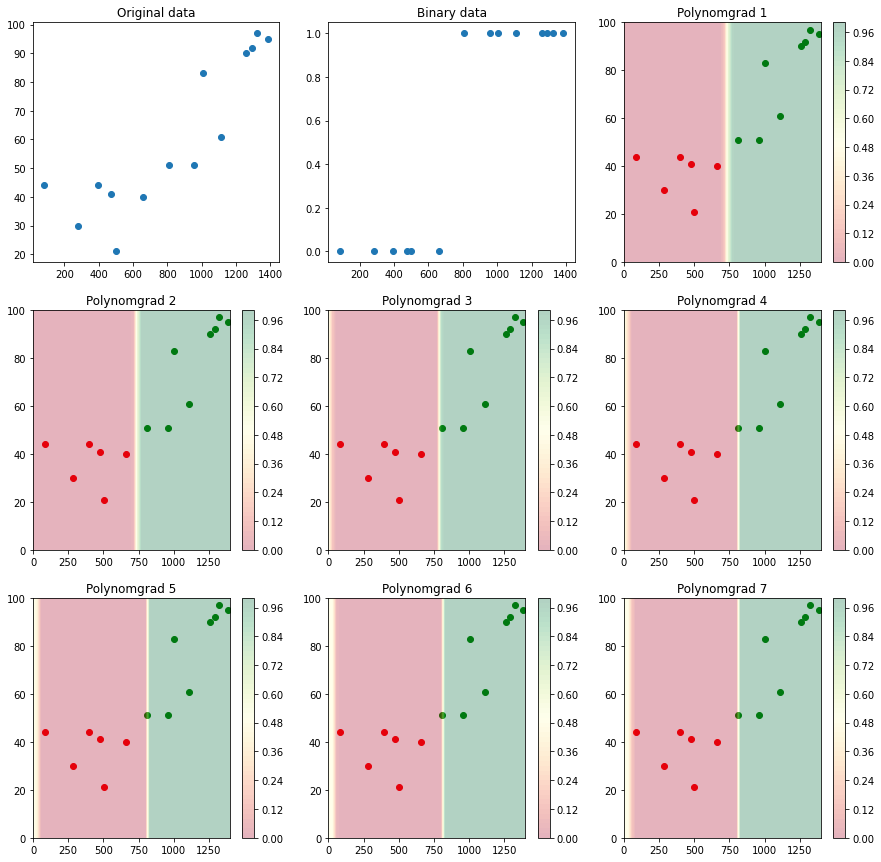

In [6]:
import warnings
warnings.filterwarnings('ignore')

studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])
result_binary = np.array([1 if i >= 50 else 0 for i in result])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 3, 1)
ax.set_title("Original data")
ax.scatter(studying, result)
ax = fig.add_subplot(3, 3, 2)
ax.set_title("Binary data")
ax.scatter(studying, result_binary)

for i in range(1, 8):
    
    # Plot the original data
    ax = fig.add_subplot(3, 3, i+2)
    ax.set_title("Polynomgrad {}".format(i))
    plot_original_data(ax, studying, result)
    
    # Train the model
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(studying.reshape(-1, 1))
    model = LogisticRegression(solver='newton-cg', max_iter=1000)
    model.fit(x_poly, result_binary)

    # Predict the studying
    predicted = model.predict_proba(poly.transform(studying.reshape(-1, 1)))
    #print(predicted)
    score = model.score(x_poly, result_binary)
    print("Genauigkeit für Polynomgrad {}: {} Prozent.".format(i,score*100))
    
    # Visualise the model
                
    x_axis, y_axis = np.linspace(0, 1400), np.linspace(0, 100)
    x1, x2 = np.meshgrid(x_axis, y_axis)

    z = np.array([model.predict_proba(poly.transform(x_axis.reshape(-1, 1))).T[1] for y in y_axis])

    contourf_ = ax.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)
    fig.colorbar(contourf_, ax=ax)
    print(model.coef_)